# Heatmap of revenue depending on application type and customer age

_This is a demo notebook that can be used to explore Contiamo Labs. It uses a demo database created by Contiamo containing transaction information for a mobile app retailer._

In [2]:
import pandas as pd
import contiamo

import seaborn as sns
import numpy as np

### Query data into Contiamo

In [3]:
transactions = %contiamo query query:sql:48590597:411:g71GXzJjsx4Uvad11ouKjoYbQUNNPy-qRMKkBNZfyx4
customers = %contiamo query query:sql:48590597:441:MG5W2dMjXzYgsHsgdQYzmhv44dxEQX2Lodu5Uh2Hx_s
applications = %contiamo query query:sql:48590597:442:-gz3nbw1fdmtSXkD4zGNA-cVa7s6sQtRn8upCSn6uys            

### Select data from the customers table

In [4]:
df1 = pd.DataFrame ({
        'Age' : customers['Field age'],
        'Customer id' : customers['Field customer id']
    })

### Select data from the transactions table

In [5]:
df2 = pd.DataFrame ({
        'Revenue' : transactions['Field app price'],
        'Application type' : transactions['Field app type'],
        'Customer id' : transactions['Field customer id']
        })

### Merge tables and group by application type and age 

In [6]:
df = df2.set_index('Customer id').join(df1.set_index('Customer id'))
df['Revenue']=pd.to_numeric(df['Revenue'])
df = df.groupby(['Application type','Age'], as_index=False).sum()

### Convert table into matrix

In [7]:
df = df.pivot_table('Revenue', 'Application type', 'Age', fill_value=0)
df

Age,18-24,25-34,35-44,45-54,55+
Application type,,,,,
education_kids,24468.00,60761.06,36410.19,18423.18,11478.12
food_drinks,22268.93,24275.75,46142.80,83340.96,70054.26
games_entertainment,114676.43,111843.65,19027.01,35896.56,9402.06
health_fitness,127689.20,118133.67,114227.22,31343.59,27461.58
news,19428.92,19589.35,78915.73,75913.17,44529.35
productivity,26501.45,41009.90,28818.33,22043.54,12454.79
social_relationships,102756.60,85569.32,59656.53,47437.62,27523.74


### Display heatmap

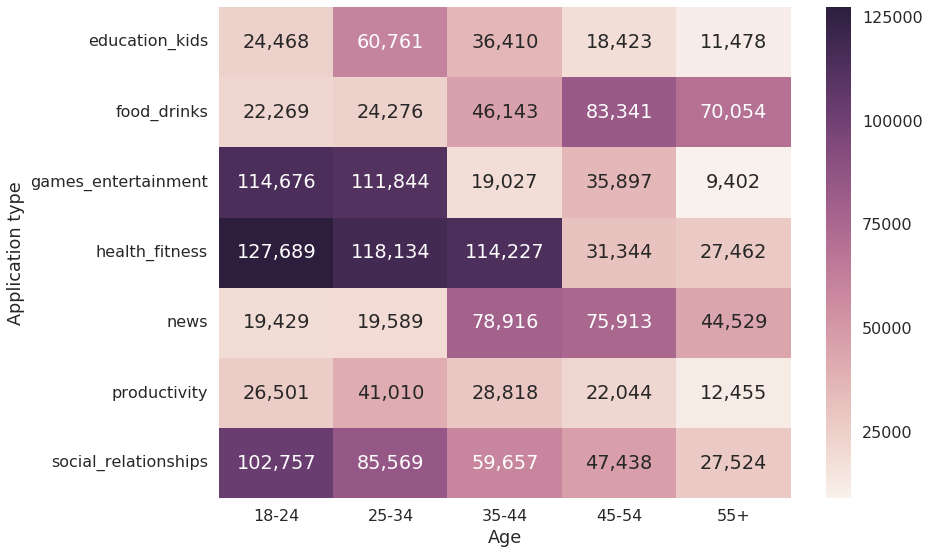

In [9]:
sns.set_context("poster")  # display large charts
sns.heatmap(df, annot=True, fmt=',.0f');